In [1]:
# 여러분의 정신 건강을 위해, 그냥 프로젝트 옮길 때마다 복붙 해서 쓰는 것을 추천 드립니다.
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## XOR Gate?
XOR Gate는 일반적인 선형 모델로는 해결 할 수 없습니다.

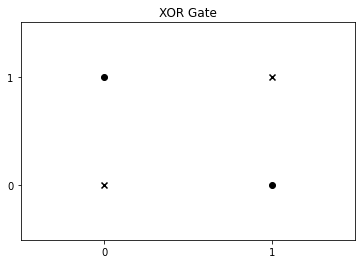

In [2]:
x = np.array([
    [0, 0, 1, 1],
    [0, 1, 0, 1]
])
y = np.array([0, 1, 1, 0])
marker = ['x', 'o']

for i in range(4):
    plt.scatter(x[0][i], x[1][i], color='black', marker=marker[y[i]])

plt.title("XOR Gate")
plt.xlim(-0.5, 1.5)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.ylim(-0.5, 1.5)
plt.show()

## Multi-Layer Perceptron
하지만, 퍼셉트론을 여러개 이용 한다면, 문제를 해결 할 수 있습니다.

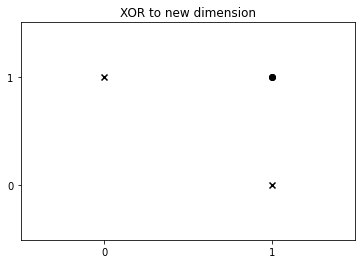

In [3]:
new_x = np.array([x[0] + x[1] < 1.5, x[0] + x[1] > 0.5])
marker = ['x', 'o']

for i in range(4):
    plt.scatter(new_x[0][i], new_x[1][i], color='black', marker=marker[y[i]])

plt.title("XOR to new dimension")
plt.xlim(-0.5, 1.5)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.ylim(-0.5, 1.5)
plt.show()

## Pytorch Tensor
**Pytorch**에서 **Tensor**는 계산의 기본 단위로, **Numpy**의 `ndarray`와 유사 합니다.

`Tensor` 객체를 만드는 여러 가지 방법들을 알려 드리겠습니다.
- `torch.empty(x, y)`: x * y 사이즈의 요소들의 값이 초기화 되지 않은 행렬 반환.
- `torch.rand(x, y)`: x * y 사이즈의 요소들이 **0 ~ 1 사이의 랜덤한 값**으로 초기화 된 행렬 반환.
- `torch.randn(x, y)`: x * y 사이즈의 요소들이 **정규분포 그래프** 상의 랜덤한 값으로 초기화 된 행렬 반환.
- `torch.zeros(x, y, dtype=type)`: x * y 사이즈의 요소들이 **0으로 초기화** 된 행렬 반환, 요소들은 type에 맞게 초기화 된다.
- `torch.ones(x, y, dtype=type)`: x * y 사이즈의 요소들이 **1으로 초기화** 된 행렬 반환, 요소들은 type에 맞게 초기화 된다.
- `torch.tensor(iterable)`: `iterable`한 객체를 `Tensor` 객체로 변환한다.
- `torch.zeros_like(tensor, dtype=type)`: 파라미터로 들어 간 `Tensor` 객체의 사이즈과 똑같은 행렬을 반환하며, 요소들은 **0으로 초기화** 되어 있다.
- `torch.ones_like(tensor, dtype=type)`: 파라미터로 들어 간 `Tensor` 객체의 사이즈과 똑같은 행렬을 반환하며, 요소들은 **1으로 초기화** 되어 있다.
- `torch.randn_like(tensor, dtype=type)`: 파라미터로 들어 간 `Tensor` 객체의 사이즈과 똑같은 행렬을 반환하며, 요소들은 **정규분포 그래프** 상의 랜덤한 값으로 초기화 되어 있다.

In [4]:
empty_tensor = torch.empty(3, 3)											# 3 * 3의 빈 행렬 생성
rand_tensor = torch.rand(3, 3)												# 3 * 3의 요소들이 0 ~ 1의 랜덤 값으로 초기화된 행렬 생성
randn_tensor = torch.randn(3, 3, dtype=torch.double)						# 3 * 3의 요소들이 정규분포 그래프 값으로 초기화된 행렬 생성
zero_tensor = torch.zeros(3, 3, dtype=torch.long)							# 3 * 3의 요소들이 0으로 초기화된 행렬 생성
one_tensor = torch.ones(3, 3, dtype=torch.double)							# 3 * 3의 요소들이 1으로 초기화된 행렬 생성
iterable_tensor = torch.tensor([1, 2, 3])									# list 객체를 Tensor 객체로 변환
zeros_like_tensor = torch.zeros_like(iterable_tensor, dtype=torch.double)	# iterable_tensor와 사이즈가 같은, 요소들이 0으로 초기화된 행렬 생성
ones_like_tensor = torch.ones_like(iterable_tensor, dtype=torch.double)		# iterable_tensor와 사이즈가 같은, 요소들이 1으로 초기화된 행렬 생성
randn_like_tensor = torch.randn_like(iterable_tensor, dtype=torch.double)	# iterable_tensor와 사이즈가 같은, 요소들이 정규분포 그래프 값으로 초기화된 행렬 생성

print(empty_tensor)
print(rand_tensor)
print(randn_tensor)
print(zero_tensor)
print(one_tensor)
print(iterable_tensor)
print(zeros_like_tensor)
print(ones_like_tensor)
print(randn_like_tensor)

tensor([[ 0.0000e+00,  2.0000e+00,  0.0000e+00],
        [ 2.0000e+00,  4.3631e-05,  1.2893e+16],
        [-1.5605e+06,         nan,  0.0000e+00]])
tensor([[0.2207, 0.4548, 0.9525],
        [0.0042, 0.7384, 0.2160],
        [0.3493, 0.8481, 0.3686]])
tensor([[ 1.5607, -0.3080, -1.3471],
        [ 0.0217, -0.1955,  0.1367],
        [-1.4050, -1.0051,  0.3373]], dtype=torch.float64)
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([1, 2, 3])
tensor([0., 0., 0.], dtype=torch.float64)
tensor([1., 1., 1.], dtype=torch.float64)
tensor([-0.2557, -2.3685,  0.9853], dtype=torch.float64)


일단 기본적인 **연산자**는 다음과 같이 사용 할 수 있습니다. 또한, `Numpy`에서 사용 했던, **차원별 인덱싱**과 **브로드캐스팅**이 가능합니다.

In [5]:
x_tensor = torch.tensor([[1, 2], [3, 4]]) # 2 * 2 행렬 생성
y_tensor = torch.tensor([[5, 6], [7, 8]])
z_tensor = torch.tensor([[[1, 2], [3, 4]], [[1, 2], [3, 4]]])

print(x_tensor)
print(y_tensor)

print(x_tensor + y_tensor)  # Index가 일치하는 요소 끼리 덧셈
print(x_tensor - y_tensor)  # Index가 일치하는 요소 끼리 뺄셈
print(x_tensor * y_tensor)  # Index가 일치하는 요소 끼리 곱셈
print(x_tensor @ y_tensor)  # 행렬 곱
print(x_tensor * 3)         # x_tensor 각 요소에 3을 곱해줌

print(x_tensor + z_tensor)  # 일치하는 요소에 브로드캐스팅

a_tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
b_tensor = torch.tensor([[1, 2], [3, 4], [5, 6]])
print(a_tensor)
print(b_tensor)
print(a_tensor @ b_tensor)  # 2 * 3 행렬과 3 * 2 행렬 곱셈
print(a_tensor[:, 1])       # 각 행의 1번째 열 추출
print(b_tensor[1, :])       # 1번째 행의 모든 열 추출

tensor([[1, 2],
        [3, 4]])
tensor([[5, 6],
        [7, 8]])
tensor([[ 6,  8],
        [10, 12]])
tensor([[-4, -4],
        [-4, -4]])
tensor([[ 5, 12],
        [21, 32]])
tensor([[19, 22],
        [43, 50]])
tensor([[ 3,  6],
        [ 9, 12]])
tensor([[[2, 4],
         [6, 8]],

        [[2, 4],
         [6, 8]]])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[22, 28],
        [49, 64]])
tensor([2, 5])
tensor([3, 4])


**딥러닝 모델**을 설계하다 보면 **행렬 사이즈를 재조정** 해야 하는 경우가 상당히 많습니다. 이를 위한 **몇 가지 함수**를 소개 시켜 드리겠습니다.
- `Tensor.size()`: `Tensor` 객체의 **사이즈를 반환** 한다.
- `Tensor.view(size)`: 파라미터로 들어간 사이즈로 `Tensor` 객체의 **사이즈를 변환** 시켜 주며, 파라미터로 -1이 들어갈 시, **행렬의 차원 수를 낮춰** 리사이징 하며, (-1, n)이 들어가면 가장 **하위 차원에서 n개씩 끊어 넣는 방식**으로 리사이징 한다. `numpy`의 `resize`와 방법이 유사하다.

a_tensor = torch.tensor([[1, 2, 3, 4],      # 4 * 4 행렬
                         [5, 6, 7, 8],
                         [9, 10, 11, 12],
                         [13, 14, 15, 16]])
print(a_tensor)
print(a_tensor.size())

b_tensor = a_tensor.view(16)                # 사이즈가 16 array
print(b_tensor)
print(b_tensor.size())

c_tensor = a_tensor.view(-1, 8)             # 4 * 4 => 2 * 8
print(c_tensor)                             # 6 * 4 일시 3 * 8 으로 리사이징 된다.
print(c_tensor.size())

d_tensor = a_tensor.view(-1)                # 4 * 4 => 16
print(d_tensor)                             # 6 * 4 일시 24로 리사이징 된다.
print(d_tensor.size())

e_tensor = a_tensor.view(8, 2)              # 8 * 2 행렬로 사이즈 변환
print(e_tensor)
print(e_tensor.size())

`Pytorch`는 `Numpy`연산을 GPU를 이용하여 더욱 빠르게 하기 위해 탄생했습니다. 그렇기 때문에 `Numpy`와 `Pytorch`를 연동할 수 있도록, `Pytorch`에서는 `API`를 제공합니다.

- `Tensor.numpy()`: `Tensor` 객체를 `numpy.ndarray` 객체로 변환 하여 반환합니다.
- `torch.from_numpy(ndarray)`: `numpy.ndarray`를 `Tensor` 객체로 변환 하여 반환합니다.

In [6]:
a_matrix = np.array([[1, 2], [3, 4]])   # np.ndarray 객체 할당
b_matrix = torch.from_numpy(a_matrix)   # np.ndarray 객체를 이용하여 Tensor 객체 할당
c_matrix = b_matrix.numpy()             # Tensor 객체를 이용하여 np.ndarray 객체 할당

print(a_matrix)                         # np.ndarray
print(b_matrix)                         # Tensor
print(c_matrix)                         # np.ndarray

[[1 2]
 [3 4]]
tensor([[1, 2],
        [3, 4]])
[[1 2]
 [3 4]]


## Autograd
Pytorch에서는 연산을 진행 하면 전 연산에 대한 미분 또한 제공 합니다. 이는 각 `Tensor`에 `requires_grad=True`를 넣어 줌으로써 기능 합니다.

In [7]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

x = torch.ones(2, 2)
x.requires_grad_(True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


**역전파 (Back Propagation)**를 시키는 방법은 생각보다 간단합니다. 최종 연산 된 `Tensor` 객체의 `backward()` 함수만 호출해 주면 됩니다.

`out = z/4 = y * y * 3/4 = (x + 2)^2 * 3 / 4` 이고, 이를 **x**에 대해서 미분하면
`dout/dx = 3(2x + 4) / 4` 입니다. **x = 1**일 경우 **18 / 4 = 4.5** 가 정답이므로, 잘 작동 하고 있다고 볼 수 있습니다.

주의: **out**에 한 연산은 **스칼라 연산**입니다. **행렬 곱**등을 사용하지 않았습니다.

In [8]:
x = torch.ones(2, 2, requires_grad=True)  # 최초 Tensor 객체
y = x + 2
z = y * y * 3
out = z.mean()  # 미분 대상

out.backward()	# out.backward(torch.tensor(1.)) 과 동일
print(x.grad)   # dout/dx

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


행렬 미분은 다음과 같습니다.

In [9]:
x = torch.ones(2, 3, requires_grad=True)  # 최초 Tensor 객체
y = torch.ones(3, 6)
z = x @ y	# x @ y 행렬 곱, 더 이상 스칼라 값이 아니다.
out = z * 2
print(out)

out.backward(torch.ones(2, 6) * 2)   # dout/dz
print(x.grad)   # dout/dx

tensor([[6., 6., 6., 6., 6., 6.],
        [6., 6., 6., 6., 6., 6.]], grad_fn=<MulBackward0>)
tensor([[24., 24., 24.],
        [24., 24., 24.]])


역전파 연산이 필요 없을 때는 다음 두 가지 방법 중 하나를 선택합니다.

1. `torch.no_grad()` 를 이용하여 연산하기.
2. `Tensor.detech()` 를 이용하여, `autograd` 연산을 하지 않은 `Tensor` 복사하기.

In [10]:
x = torch.ones(2, 2, requires_grad=True)

print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():	# autograd 연산 생략
  print((x ** 2).requires_grad)

print('')

y = x.detach()			# autograd가 없이 내용물만 복사.
print(y.requires_grad)
print(x.eq(y).all())	# x와 y의 내용물은 같다.

True
True
False

False
tensor(True)


## Fashion MNIST
우리가 오늘 해 볼 것은, **DNN을 이용한 Fashion MNIST Dataset** 분류 입니다. 여기서 말하는 **Fashion MNIST**는 입력이 28x28 크기의 행렬로 이루어져 있고 출력은 10개의 분류로 나타 냅니다. 열 개의 분류는 다음과 같습니다. (T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot)

첫 번째로, 데이터를 불러 오기 전, 데이터를 전처리 하기 위한 **파이프 라인**을 구성 해 보겠습니다. 아래 코드는 **Input Data**를 **Tensor**로 만들고, 이를 **Z-Score Normalization**을 하는 모습입니다. `transforms.Compose`를 이용하여 파이프라인을 구성하고, `transforms.ToTensor()`를 통해 `Tensor`로의 변환, `transforms.Normalize`를 통해 Z-Score Normalization을 실시 합니다.

In [11]:
RANDOM_SEED = 123
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [12]:
custom_train_transform = transforms.Compose([  
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=(0.5,), std=(0.5,))
])

custom_test_transform = transforms.Compose([
                                             transforms.ToTensor(),
                                             transforms.Normalize(mean=(0.5,), std=(0.5,))
])

두 번째로는 만들어진 **파이프라인**에, **Fashion MNIST** 데이터를 넣어 전처리를 해 보겠습니다. 이는 `Dataset`을 불러 올 때 `transform` 파라미터에 값을 넣어 줌으로써 가능 합니다.

`DataLoader`를 통해 **데이터 셋**을 **미니 배치**로 분류하고, **데이터를 섞어 줄 수** 있습니다.

In [13]:
BATCH_SIZE = 64

train_dataset = FashionMNIST(".", train=True, download=True, transform=custom_train_transform)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          drop_last=True,
                          num_workers=2)


test_dataset = FashionMNIST(".", train=False, download=True, transform=custom_test_transform)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=2)

/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1623459044803/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


아래 창은 데이터가 잘 다운로드 되었는지 확인 하는 코드입니다.

In [14]:
for batch_idx, (x, y) in enumerate(train_loader):
    print(' | Batch size:', y.size()[0])

    x = x.to(DEVICE)
    y = y.to(DEVICE)
    
    print("X shape: ", x.shape)
    print("Y shape: ", y.shape)

    print('break minibatch for-loop')
    break

 | Batch size: 64
X shape:  torch.Size([64, 1, 28, 28])
Y shape:  torch.Size([64])
break minibatch for-loop


## Deep Neural Network
이제 **DNN 모델**을 구현 해 볼 시간입니다. 한 번 구현을 해 볼까요?

일단 코드 설명을 드리자면, 가장 먼저 해야할 일은 `torch.nn.Module`을 상속 받은 class를 만드는 것입니다. 그 다음, 생성자와 `forward` 함수를 구현 해 주면 됩니다.

먼저 생성자 함수는 `super(클래스명, self).__init__()`을 통해, 모델 초기화를 해 주어야 하며, 그 다음으로는 `torch.nn.Linear`로 층을 쌓아 줍니다. `torch.nn.Linear`는 파라미터로 (input_features, output_features)를 입력 해 줍니다. 입력 차원과 출력 차원을 입력 해 주어야 한다는 것입니다. 층을 입력 해 줄때마다 **Input Vector**에 대해 (input_features X output_features) 에 대한 행렬 곱을 하는 것과 같습니다.

`forward`에서는 순전파 연산을 진행 합니다. 파라미터로 데이터를 넣어 가면서 통과 시키면 되지만, 여기서 중간에 **ReLU** 함수를 넣는 것을 볼 수가 있습니다. 그 이유는, **y = ax + b** 꼴의 층을 쌓는다고 한들, 층을 하나 더 쌓으면 **y = c(ax + b) + d = acx + bc + d** 꼴이 되기 때문에, 학습이 되지 않습니다. 그렇기 때문에, **활성화 함수**를 사용 합니다.

**ReLU** 함수는 0보다 작거나 같으면 0을, 0보다 크면 그대로 값을 반환 합니다.

In [15]:
class DNN(torch.nn.Module):
    def __init__(self, num_features, num_hidden_1, num_hidden_2, num_hidden_3, num_classes):
        super(DNN, self).__init__()
        
        self.num_classes = num_classes
        
        self.linear_1 = torch.nn.Linear(num_features, num_hidden_1)
        self.linear_2 = torch.nn.Linear(num_hidden_1, num_hidden_2)
        self.linear_3 = torch.nn.Linear(num_hidden_2, num_hidden_3)
        self.linear_out = torch.nn.Linear(num_hidden_3, num_classes)
        
    def forward(self, x):
        ### activation 함수 변경 가능
        ### (optional)레이어간의 연결 추가, 변경 가능
        out = self.linear_1(x)
        out = torch.relu(out)
        out = self.linear_2(out)
        out = torch.relu(out)
        out = self.linear_3(out)
        out = torch.relu(out)
        logits = self.linear_out(out)
        probas = torch.sigmoid(logits)
        return logits, probas
    
random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

model = DNN(num_features=28*28,
            num_hidden_1=1024,
            num_hidden_2=128,
            num_hidden_3=64,
            num_classes=10)

model = model.to(DEVICE)

## Training
Training 과정에 대한 코드는 주석으로 설명 하겠습니다.

In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 파라미터 학습을 위한 optimizer, 경사 하강법에 도움을 줌
NUM_EPOCHS = 20

def compute_accuracy_and_loss(model, data_loader, device):  # 손실 계산
    correct_pred, num_examples = 0, 0
    cross_entropy = 0.
    for i, (features, targets) in enumerate(data_loader):  # 미니 배치 iteration
            
        features = features.view(-1, 28*28).to(device)  # view를 통해 [batch_size * 784] 크기로 변경
        targets = targets.to(device)  # 타겟

        logits, probas = model(features)  # 모델 결과 반환 (결과, sigmoid 적용한 결과)
        cross_entropy += F.cross_entropy(logits, targets).item()  # 타겟과 연산 결과의 cost function 결과
        _, predicted_labels = torch.max(probas, 1)  # 예측 결과 반환
        num_examples += targets.size(0)  # input 개수 반환
        correct_pred += (predicted_labels == targets).sum()  # 맞은 갯수 반환
    return correct_pred.float()/num_examples * 100, cross_entropy/num_examples  # 정확도, cost function 평균
    

start_time = time.time()  # 시작 시간 계산
train_acc_lst, test_acc_lst = [], []  # 훈련 데이터 정확도, 테스트 데이터 정확도
train_loss_lst, test_loss_lst = [], []  # 훈련 데이터 손실함수, 테스트 데이터 손실함수

for epoch in range(NUM_EPOCHS):  # EPOCH 만큼 반복
    
    model.train()  # 학습 모드
    
    for batch_idx, (features, targets) in enumerate(train_loader):  # 미니 배치 iteration
    
        ### PREPARE MINIBATCH
        features = features.view(-1, 28*28).to(DEVICE)
        targets = targets.to(DEVICE)
            
        ### FORWARD AND BACK PROP
        logits, probas = model(features)  # 순전파
        cost = F.cross_entropy(logits, targets)  # 예측 결과에 대한 cost function 계산
        optimizer.zero_grad()  # 기울기 0 초기화
        
        cost.backward()  # 역전파
        
        ### UPDATE MODEL PARAMETERS
        optimizer.step()  # 모델 파라미터 업데이트
        
        ### LOGGING
        if not batch_idx % 40:
            print (f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} | '
                   f'Batch {batch_idx:03d}/{len(train_loader):03d} |' 
                   f' Cost: {cost:.4f}')

    # 매 Epoch마다 evaluation을 진행합니다. 
    # Epoch마다 Loss를 기록하여 학습과정을 살펴보고 Underfitting, Overfitting 여부를 확인합니다.
    model.eval()
    with torch.set_grad_enabled(False): # Gradient 계산이 안되도록
        train_acc, train_loss = compute_accuracy_and_loss(model, train_loader, device=DEVICE) # train acc, loss 계산
        test_acc, test_loss = compute_accuracy_and_loss(model, test_loader, device=DEVICE)    # test acc, loss 계산
        
        # list에 train, test의  acc, loss 추가
        train_acc_lst.append(train_acc)
        test_acc_lst.append(test_acc)
        train_loss_lst.append(train_loss)
        test_loss_lst.append(test_loss)
        
        # 로깅
        print(f'Epoch: {epoch+1:03d}/{NUM_EPOCHS:03d} Train Acc.: {train_acc:.2f}%'
              f' | Test Acc.: {test_acc:.2f}%')
    
    # 1 epoch 학습 소요시간
    elapsed = (time.time() - start_time)/60
    print(f'Time elapsed: {elapsed:.2f} min')

# 총 학습 소요시간
elapsed = (time.time() - start_time)/60
print(f'Total Training Time: {elapsed:.2f} min')

Epoch: 001/020 | Batch 000/937 | Cost: 2.3114
Epoch: 001/020 | Batch 040/937 | Cost: 2.2735
Epoch: 001/020 | Batch 080/937 | Cost: 2.2252
Epoch: 001/020 | Batch 120/937 | Cost: 2.2205
Epoch: 001/020 | Batch 160/937 | Cost: 2.1145
Epoch: 001/020 | Batch 200/937 | Cost: 2.0471
Epoch: 001/020 | Batch 240/937 | Cost: 1.8903
Epoch: 001/020 | Batch 280/937 | Cost: 1.6582
Epoch: 001/020 | Batch 320/937 | Cost: 1.4389
Epoch: 001/020 | Batch 360/937 | Cost: 1.2485
Epoch: 001/020 | Batch 400/937 | Cost: 1.1641
Epoch: 001/020 | Batch 440/937 | Cost: 1.1016
Epoch: 001/020 | Batch 480/937 | Cost: 0.8922
Epoch: 001/020 | Batch 520/937 | Cost: 0.7814
Epoch: 001/020 | Batch 560/937 | Cost: 0.9429
Epoch: 001/020 | Batch 600/937 | Cost: 0.6929
Epoch: 001/020 | Batch 640/937 | Cost: 0.7542
Epoch: 001/020 | Batch 680/937 | Cost: 0.7000
Epoch: 001/020 | Batch 720/937 | Cost: 0.7436
Epoch: 001/020 | Batch 760/937 | Cost: 0.5720
Epoch: 001/020 | Batch 800/937 | Cost: 0.7518
Epoch: 001/020 | Batch 840/937 | C

Epoch: 008/020 | Batch 000/937 | Cost: 0.3647
Epoch: 008/020 | Batch 040/937 | Cost: 0.3286
Epoch: 008/020 | Batch 080/937 | Cost: 0.3667
Epoch: 008/020 | Batch 120/937 | Cost: 0.3888
Epoch: 008/020 | Batch 160/937 | Cost: 0.4417
Epoch: 008/020 | Batch 200/937 | Cost: 0.3775
Epoch: 008/020 | Batch 240/937 | Cost: 0.2421
Epoch: 008/020 | Batch 280/937 | Cost: 0.3718
Epoch: 008/020 | Batch 320/937 | Cost: 0.2786
Epoch: 008/020 | Batch 360/937 | Cost: 0.4597
Epoch: 008/020 | Batch 400/937 | Cost: 0.3736
Epoch: 008/020 | Batch 440/937 | Cost: 0.2711
Epoch: 008/020 | Batch 480/937 | Cost: 0.2711
Epoch: 008/020 | Batch 520/937 | Cost: 0.5664
Epoch: 008/020 | Batch 560/937 | Cost: 0.3911
Epoch: 008/020 | Batch 600/937 | Cost: 0.4947
Epoch: 008/020 | Batch 640/937 | Cost: 0.3400
Epoch: 008/020 | Batch 680/937 | Cost: 0.3508
Epoch: 008/020 | Batch 720/937 | Cost: 0.4271
Epoch: 008/020 | Batch 760/937 | Cost: 0.3569
Epoch: 008/020 | Batch 800/937 | Cost: 0.4487
Epoch: 008/020 | Batch 840/937 | C

Epoch: 015/020 | Batch 000/937 | Cost: 0.2274
Epoch: 015/020 | Batch 040/937 | Cost: 0.2634
Epoch: 015/020 | Batch 080/937 | Cost: 0.2339
Epoch: 015/020 | Batch 120/937 | Cost: 0.2060
Epoch: 015/020 | Batch 160/937 | Cost: 0.2297
Epoch: 015/020 | Batch 200/937 | Cost: 0.4140
Epoch: 015/020 | Batch 240/937 | Cost: 0.3265
Epoch: 015/020 | Batch 280/937 | Cost: 0.3803
Epoch: 015/020 | Batch 320/937 | Cost: 0.2128
Epoch: 015/020 | Batch 360/937 | Cost: 0.2262
Epoch: 015/020 | Batch 400/937 | Cost: 0.2818
Epoch: 015/020 | Batch 440/937 | Cost: 0.1845
Epoch: 015/020 | Batch 480/937 | Cost: 0.1903
Epoch: 015/020 | Batch 520/937 | Cost: 0.3282
Epoch: 015/020 | Batch 560/937 | Cost: 0.1685
Epoch: 015/020 | Batch 600/937 | Cost: 0.2902
Epoch: 015/020 | Batch 640/937 | Cost: 0.2541
Epoch: 015/020 | Batch 680/937 | Cost: 0.1614
Epoch: 015/020 | Batch 720/937 | Cost: 0.1417
Epoch: 015/020 | Batch 760/937 | Cost: 0.2117
Epoch: 015/020 | Batch 800/937 | Cost: 0.2240
Epoch: 015/020 | Batch 840/937 | C

## Evaluation
테스트 데이터와 학습 데이터의 Loss변화를 확인합니다.

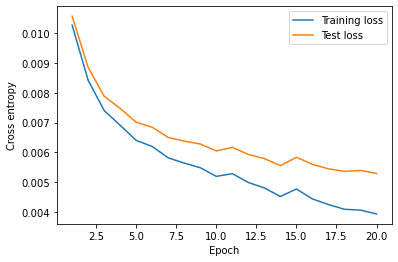

In [17]:
plt.plot(range(1, NUM_EPOCHS+1), train_loss_lst, label='Training loss')
plt.plot(range(1, NUM_EPOCHS+1), test_loss_lst, label='Test loss')
plt.legend(loc='upper right')
plt.ylabel('Cross entropy')
plt.xlabel('Epoch')
plt.show()

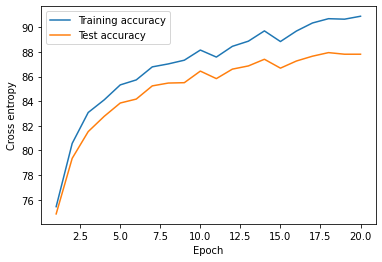

In [18]:
plt.plot(range(1, NUM_EPOCHS+1), train_acc_lst, label='Training accuracy')
plt.plot(range(1, NUM_EPOCHS+1), test_acc_lst, label='Test accuracy')
plt.legend(loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [19]:
model.eval()
with torch.set_grad_enabled(False): # save memory during inference
    test_acc, test_loss = compute_accuracy_and_loss(model, test_loader, DEVICE)
    print(f'Test accuracy: {test_acc:.2f}%')

Test accuracy: 87.81%
